# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-12-11 09:38:52--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.001s  

2021-12-11 09:38:52 (48.2 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from tqdm import tqdm
import seaborn as sns

In [ ]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,458,103,57,105,221,69,11,218,30,24,173,226,706,250,73,10,2,187,195
1,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
2,158,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196
3,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
4,476,101,55,101,183,57,13,225,30,25,177,225,741,204,71,5,10,186,198


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,414.843352,93.238616,44.540984,81.143898,167.142077,61.650273,8.530055,166.938069,41.357013,20.420765,147.342441,187.225865,429.544627,172.961749,72.708561,6.185792,12.706740,188.783242,195.473588
std,246.515855,8.214033,6.093303,15.579185,33.082647,7.995990,4.679657,32.584139,7.648294,2.531482,14.332956,31.124778,173.091112,32.576922,7.929821,4.871908,9.005654,6.280140,7.605327
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,204.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,316.000000,147.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,407.000000,92.000000,44.000000,78.000000,164.000000,61.000000,8.000000,155.000000,43.000000,19.000000,145.000000,176.000000,355.000000,172.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,630.000000,99.000000,49.000000,96.000000,193.000000,65.000000,10.000000,192.000000,46.000000,22.000000,159.000000,215.000000,559.000000,194.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,112.000000,333.000000,138.000000,55.000000,262.000000,61.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

There are no missing values and categorical variables, which means that we only need to encode classes and standardize the distribution of features so that all features have the same effect on prediction and algorithms converge faster.

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm =  normalizer.transform(X_test)

In [ ]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
np.logspace(-3, 3, 10)

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

In [ ]:
%%time
# подбираем гиперпараметры
log_reg_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

grid = {'C': np.logspace(-3, 3, 10),
        'penalty': ['l1', 'l2']}

grid_log_reg = GridSearchCV(log_reg_model, grid, scoring=['accuracy', 'f1_weighted'], refit='accuracy', cv=5)
grid_log_reg.fit(X_train_norm, y_train_encoded)

CPU times: user 10.1 s, sys: 7.95 ms, total: 10.1 s
Wall time: 10 s


In [ ]:
logreg_cv_results = pd.DataFrame(grid_log_reg.cv_results_)
logreg_cv_results[['mean_test_accuracy', 'mean_test_f1_weighted']].sort_values(by=['mean_test_accuracy', 'mean_test_f1_weighted'], ascending=False)[:5]

,mean_test_accuracy,mean_test_f1_weighted
15,0.790542,0.787575
14,0.788724,0.786619
16,0.788724,0.786619
17,0.788724,0.786619
18,0.788724,0.786619


In [ ]:
grid_log_reg.best_params_

{'C': 46.41588833612773, 'penalty': 'l2'}

In [ ]:
grid_log_reg.best_score_

0.7905421184320266

In [ ]:
# accuracy and f1 on train
best_model = grid_log_reg.best_estimator_

y_pred = best_model.predict(X_train_norm)
accuracy = accuracy_score(y_train_encoded, y_pred)
f1 = f1_score(y_train_encoded, y_pred, average='weighted')
print("TRAIN ACCURACY: {}\nTRAIN F1_SCORE: {}".format(accuracy, f1))

TRAIN ACCURACY: 0.8324225865209471
TRAIN F1_SCORE: 0.8308697939942756


In [ ]:
# accuracy and f1 on test
y_pred = best_model.predict(X_test_norm)
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
print("TEST ACCURACY: {}\nTEST F1_SCORE: {}".format(accuracy, f1))

TEST ACCURACY: 0.8047138047138047
TEST F1_SCORE: 0.8010561310194304


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

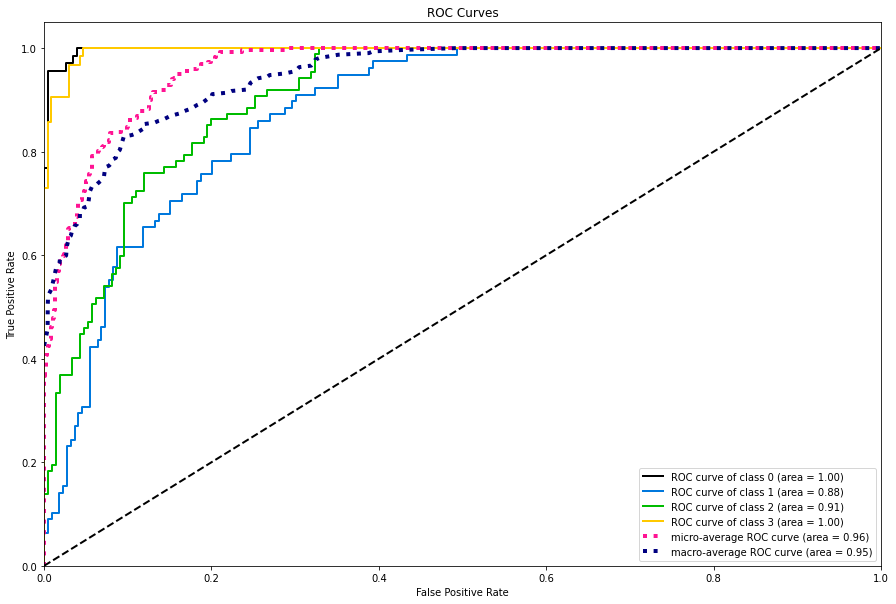

In [ ]:
from scikitplot.metrics import plot_roc

plot_roc(y_test_encoded, best_model.predict_proba(X_test_norm))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_norm)

PCA()

(1.0, 19.0)

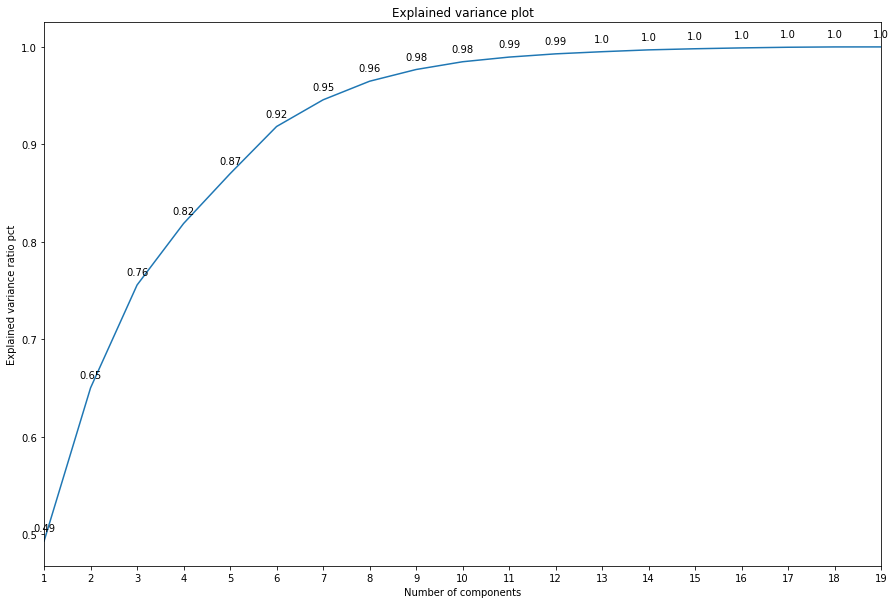

In [ ]:
fig = plt.figure(figsize=(15, 10))

feature_num = X_train_norm.shape[1]

plt.plot(np.arange(1, feature_num + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(1, feature_num + 1))
for x, y in zip(np.arange(1, feature_num + 1), pca.explained_variance_ratio_.cumsum()):
  plt.annotate(f'{y:.2}', (x, y), textcoords="offset points",
               xytext=(0,10),
               ha='center')
plt.title('Explained variance plot')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio pct')
plt.xlim(1, feature_num)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

The data has already been normalized. The data needs to be normalized before PCA so that the variance is considered correctly on all axes.

In [ ]:
### YOUR CODE HERE
np.cumsum(pca.explained_variance_ratio_)

array([0.49321318, 0.65039265, 0.75583411, 0.81888586, 0.86996872,
       0.91836403, 0.94572968, 0.96480013, 0.97681747, 0.9847788 ,
       0.98955878, 0.99287744, 0.99507922, 0.99696098, 0.99810569,
       0.99898516, 0.99964897, 0.99997986, 1.        ])

Usually, a number of components is selected that is sufficient to cover at least 80% of the variance. Since there is not a lot of data, I will take 12 components that will cover
99% of the variance.

In [ ]:
pca = PCA(n_components=12)
decomposed_train = pca.fit_transform(X_train_norm)
decomposed_test = pca.transform(X_test_norm)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
%%time
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('dim_reduction', PCA(n_components=12)), 
                 ('clf', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3))
                 ])

N_FEATURES_OPTIONS = [4, 8, 12]
C_OPTIONS = np.logspace(-3, 3, 10)
PENALTY_OPTIONS = ['l1', 'l2']

param_grid = [
    {
        "dim_reduction__n_components": N_FEATURES_OPTIONS,
        "clf__C": C_OPTIONS,
        "clf__penalty": PENALTY_OPTIONS
    },
]

scoring = ['accuracy', 'f1_weighted']

grid = GridSearchCV(pipe, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5, return_train_score=True)
grid.fit(X_train, y_train_encoded)

CPU times: user 6.21 s, sys: 59.5 ms, total: 6.27 s
Wall time: 6.2 s


In [ ]:
grid.best_params_

{'clf__C': 0.46415888336127775,
 'clf__penalty': 'l2',
 'dim_reduction__n_components': 12}

In [ ]:
#TRAIN
y_pred = grid.predict(X_train)
accuracy = accuracy_score(y_train_encoded, y_pred)
f1 = f1_score(y_train_encoded, y_pred, average='weighted')
print("ACCURACY: {}\nF1_SCORE: {}".format(accuracy, f1))

ACCURACY: 0.7759562841530054
F1_SCORE: 0.769766746157371


In [ ]:
# TEST
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
print("TEST ACCURACY: {}\nTEST F1_SCORE: {}".format(accuracy, f1))

TEST ACCURACY: 0.7205387205387206
TEST F1_SCORE: 0.7111134176514469


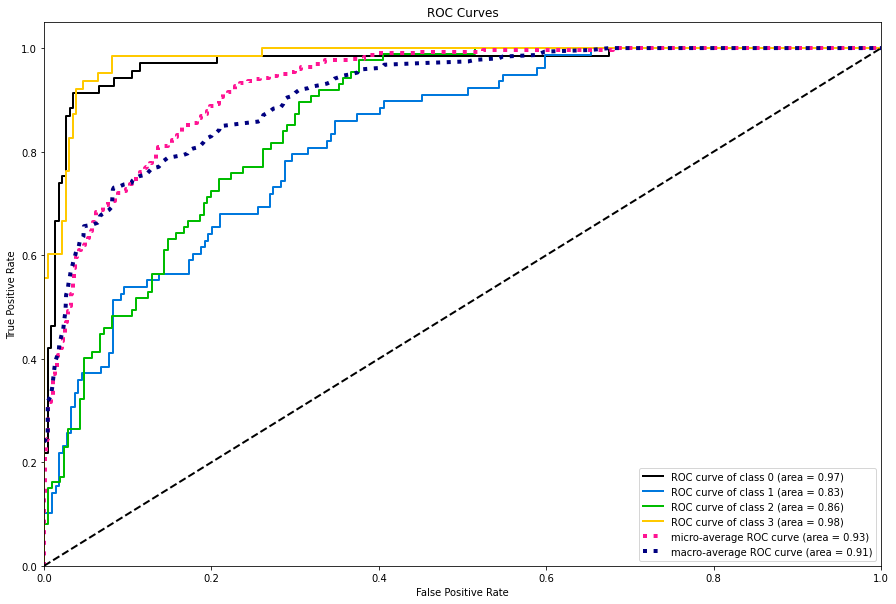

In [ ]:
plot_roc(y_test_encoded, grid.predict_proba(X_test))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
# YOUR CODE HERE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%%time
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('dim_reduction', PCA(n_components=12)), 
                 ('clf', DecisionTreeClassifier())])

MAMX_DEPTH_OPTIONS = np.linspace(1, 50, 50)


param_grid = [
    {
        "clf__max_depth": MAMX_DEPTH_OPTIONS
    }
]

scoring = ['accuracy', 'f1_weighted']

grid = GridSearchCV(pipe, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5, return_train_score=True)
grid.fit(X_train, y_train_encoded)

CPU times: user 2.59 s, sys: 11 ms, total: 2.6 s
Wall time: 2.58 s


In [ ]:
grid.best_params_

{'clf__max_depth': 7.0}

In [ ]:
#TRAIN
y_pred = grid.predict(X_train)
accuracy = accuracy_score(y_train_encoded, y_pred)
f1 = f1_score(y_train_encoded, y_pred, average='weighted')
print("ACCURACY: {}\nF1_SCORE: {}".format(accuracy, f1))

ACCURACY: 0.8233151183970856
F1_SCORE: 0.8233640973723385


In [ ]:
# TEST
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
print("TEST ACCURACY: {}\nTEST F1_SCORE: {}".format(accuracy, f1))

TEST ACCURACY: 0.6363636363636364
TEST F1_SCORE: 0.6322661626103876


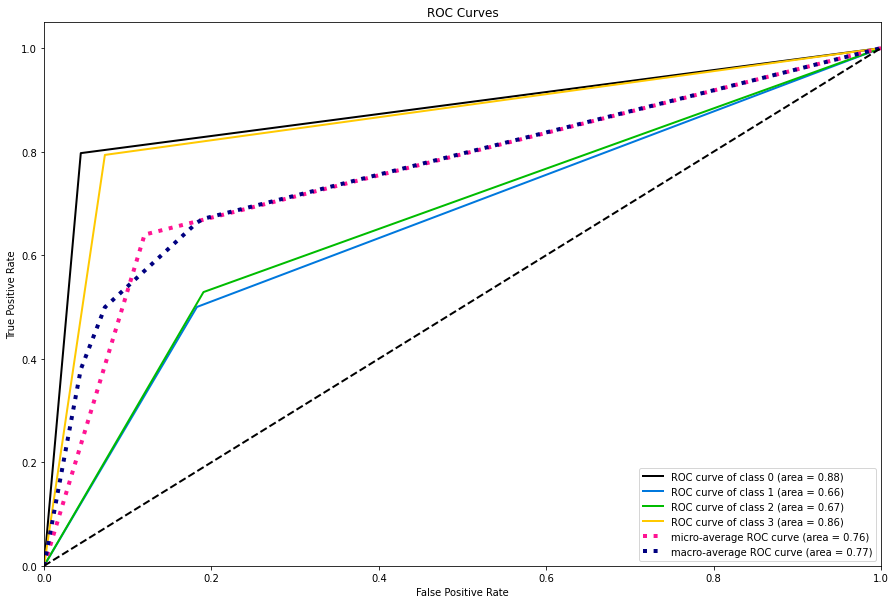

In [ ]:
plot_roc(y_test_encoded, grid.predict_proba(X_test))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

**Trees**

In [ ]:
%%time
from tqdm import tqdm

n_min = 2
n_max = 100
step = 5

alg_nums = np.arange(n_min, n_max, step)
acc_scores_train = np.array([])
f1_scores_train = np.array([])
acc_scores_test = np.array([])
f1_scores_test = np.array([])

for n_estimators in tqdm(np.arange(n_min, n_max, step)):
  pipe = Pipeline([('scaler', StandardScaler()), 
                  ('dim_reduction', PCA(n_components=12)), 
                  ('clf', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=n_estimators))
                  ])

  pipe.fit(X_train, y_train_encoded)

  y_pred_test = pipe.predict(X_test)
  y_pred_train = pipe.predict(X_train)

  acc_scores_train = np.append(acc_scores_train, accuracy_score(y_train_encoded, y_pred_train))
  f1_scores_train = np.append(f1_scores_train, f1_score(y_train_encoded, y_pred_train, average='weighted'))
  acc_scores_test = np.append(acc_scores_test, accuracy_score(y_test_encoded, y_pred_test))
  f1_scores_test = np.append(f1_scores_test, f1_score(y_test_encoded, y_pred_test, average='weighted'))

100%|██████████| 20/20 [00:05<00:00,  3.98it/s]

CPU times: user 5.3 s, sys: 1.84 s, total: 7.14 s
Wall time: 5.04 s


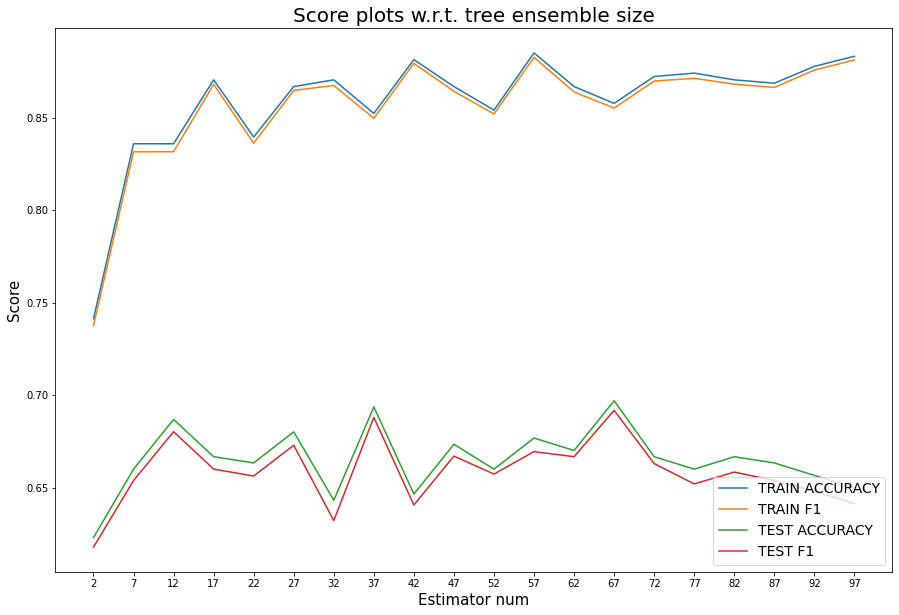

In [ ]:
fig=plt.figure()
fig.set_size_inches((15, 10))
fig.show()
ax = fig.add_subplot(111)
ax.set_xticks(alg_nums)
ax.set_xlabel('Estimator num', fontdict={'fontsize': 15})
ax.set_ylabel('Score', fontdict={'fontsize': 15})

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 10),
        }
plt.rcParams.update(params)


ax.plot(alg_nums, acc_scores_train, label='TRAIN ACCURACY')
ax.plot(alg_nums, f1_scores_train, label='TRAIN F1')
ax.plot(alg_nums, acc_scores_test, label='TEST ACCURACY')
ax.plot(alg_nums, f1_scores_test, label='TEST F1')


plt.title('Score plots w.r.t. tree ensemble size', fontdict={'fontsize': 20})
plt.legend(loc='lower right');

**Ответы на вопросы:**


*   The optimal number of algorithms, as can be seen from the graph, is 32.
*   As the number of trees grows, the quality will grow and converge to a straight line.
*   Hyperparameters from 2.5 for the ensemble are suboptimal, since in the ensemble each tree must be overfitted.

##### **Для логистической регрессии**

In [ ]:
alg_nums = np.arange(n_min, n_max, step)
acc_scores_train = np.array([])
f1_scores_train = np.array([])
acc_scores_test = np.array([])
f1_scores_test = np.array([])

for n_estimators in tqdm(np.arange(n_min, n_max, step)):
  pipe = Pipeline([('scaler', StandardScaler()), 
                  ('dim_reduction', PCA(n_components=12)), 
                  ('clf', BaggingClassifier(base_estimator=LogisticRegression(
                      multi_class='multinomial', 
                      solver='saga', 
                      tol=1e-3, C=0.46415888336127775, 
                      penalty='l1'), n_estimators=n_estimators))])
  
  pipe.fit(X_train, y_train_encoded)

  y_pred_test = pipe.predict(X_test)
  y_pred_train = pipe.predict(X_train)

  acc_scores_train = np.append(acc_scores_train, accuracy_score(y_train_encoded, y_pred_train))
  f1_scores_train = np.append(f1_scores_train, f1_score(y_train_encoded, y_pred_train, average='weighted'))
  acc_scores_test = np.append(acc_scores_test, accuracy_score(y_test_encoded, y_pred_test))
  f1_scores_test = np.append(f1_scores_test, f1_score(y_test_encoded, y_pred_test, average='weighted'))

100%|██████████| 20/20 [00:44<00:00,  2.20s/it]


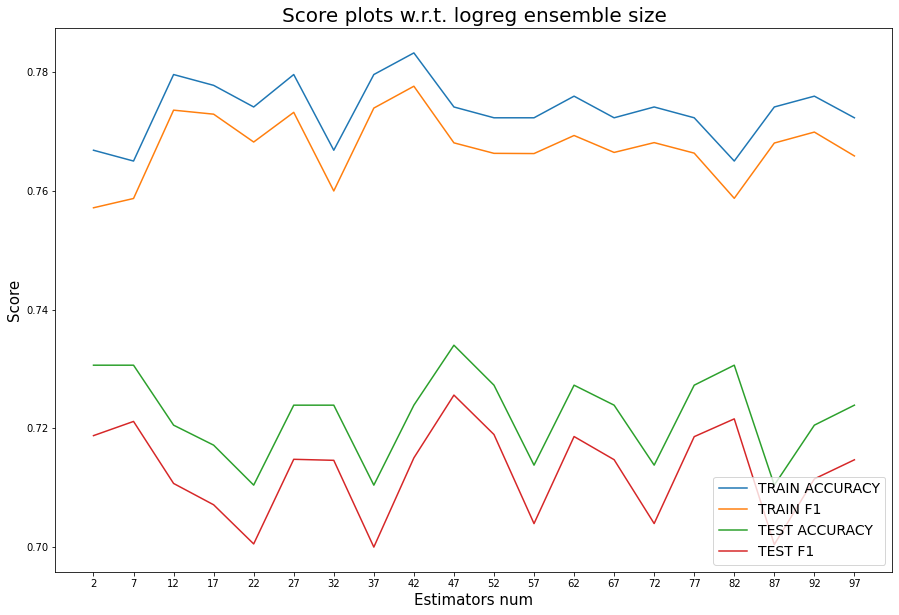

In [ ]:
fig=plt.figure()
# fig.set_size_inches((15, 10))
fig.show()
ax = fig.add_subplot(111)
ax.set_xticks(alg_nums)
ax.set_xlabel('Estimators num', fontdict={'fontsize': 15})
ax.set_ylabel('Score', fontdict={'fontsize': 15})

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 10),
        }
plt.rcParams.update(params)


ax.plot(alg_nums, acc_scores_train, label='TRAIN ACCURACY')
ax.plot(alg_nums, f1_scores_train, label='TRAIN F1')
ax.plot(alg_nums, acc_scores_test, label='TEST ACCURACY')
ax.plot(alg_nums, f1_scores_test, label='TEST F1')


plt.title('Score plots w.r.t. logreg ensemble size', fontdict={'fontsize': 20})
plt.legend(loc='lower right');

**Ответы на вопросы:**


*   The optimal number of algorithms, as can be seen from the graph, is 73.
*   As the number of logreg models grows, the quality will not grow.
*   Hyperparameters from 2.5 for the ensemble of logregs are optimal, since the linear combination of linear models is linear.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [ ]:
acc_scores_train = np.array([])
f1_scores_train = np.array([])
acc_scores_test = np.array([])
f1_scores_test = np.array([])

for n_estimators in tqdm(np.arange(n_min, n_max, step)):
  pipe = Pipeline([('scaler', StandardScaler()), 
                  ('dim_reduction', PCA(n_components=12)), 
                  ('clf', RandomForestClassifier(n_estimators=n_estimators))
                  ])

  pipe.fit(X_train, y_train_encoded)

  y_pred_test = pipe.predict(X_test)
  y_pred_train = pipe.predict(X_train)

  acc_scores_train = np.append(acc_scores_train, accuracy_score(y_train_encoded, y_pred_train))
  f1_scores_train = np.append(f1_scores_train, f1_score(y_train_encoded, y_pred_train, average='weighted'))
  acc_scores_test = np.append(acc_scores_test, accuracy_score(y_test_encoded, y_pred_test))
  f1_scores_test = np.append(f1_scores_test, f1_score(y_test_encoded, y_pred_test, average='weighted'))

100%|██████████| 20/20 [00:03<00:00,  5.48it/s]


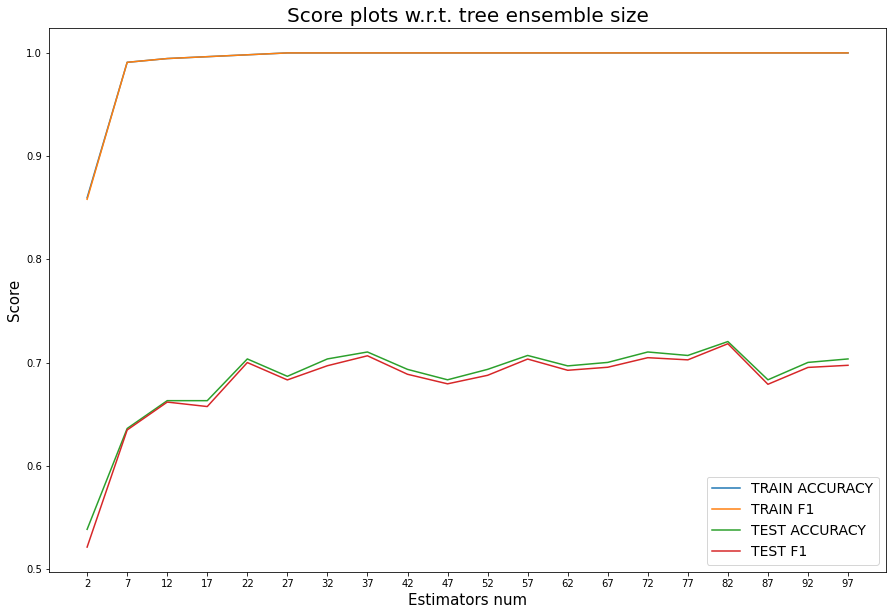

In [ ]:
fig=plt.figure()
# fig.set_size_inches((15, 10))
fig.show()
ax = fig.add_subplot(111)
ax.set_xticks(alg_nums)
ax.set_xlabel('Estimators num', fontdict={'fontsize': 15})
ax.set_ylabel('Score', fontdict={'fontsize': 15})

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 10),
        }
plt.rcParams.update(params)


ax.plot(alg_nums, acc_scores_train, label='TRAIN ACCURACY')
ax.plot(alg_nums, f1_scores_train, label='TRAIN F1')
ax.plot(alg_nums, acc_scores_test, label='TEST ACCURACY')
ax.plot(alg_nums, f1_scores_test, label='TEST F1')


plt.title('Score plots w.r.t. tree ensemble size', fontdict={'fontsize': 20})
plt.legend(loc='lower right');

##### **Ответы на вопросы**

With the growth of the number of trees, the quality increases. The optimal number of trees on the graph is 77.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE

In [ ]:
x_train_parts = np.array_split(X_train, 10)
y_train_parts = np.array_split(y_train_encoded, 10)

lr_acc = np.array([])
lr_f = np.array([])
tree_acc = np.array([])
tree_f = np.array([])
rf_acc = np.array([])
rf_f = np.array([])

acc_list = [lr_acc, tree_acc, rf_acc]
f_list = [lr_f, tree_f, rf_f]
models = [LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, 
                             C=0.46415888336127775, penalty='l1'), 
          DecisionTreeClassifier(max_depth=7), 
          RandomForestClassifier(n_estimators=83)]

def get_model_scores(model, i, acc, f):
  pipe = Pipeline([('scaler', StandardScaler()), 
                 ('dim_reduction', PCA(n_components=12)), 
                 ('clf', model)])
  
  pipe.fit(np.concatenate(x_train_parts[:i + 1]), np.concatenate(y_train_parts[:i + 1]))
  y_pred_test = pipe.predict(X_test)

  acc = np.append(acc, accuracy_score(y_test_encoded, y_pred_test))
  f = np.append(f, f1_score(y_test_encoded, y_pred_test, average='weighted'))
  return acc, f

for i in tqdm(range(10)):
  for j in range(3):
    acc_list[j], f_list[j] = get_model_scores(models[j], i, acc_list[j], f_list[j])

100%|██████████| 10/10 [00:02<00:00,  4.47it/s]


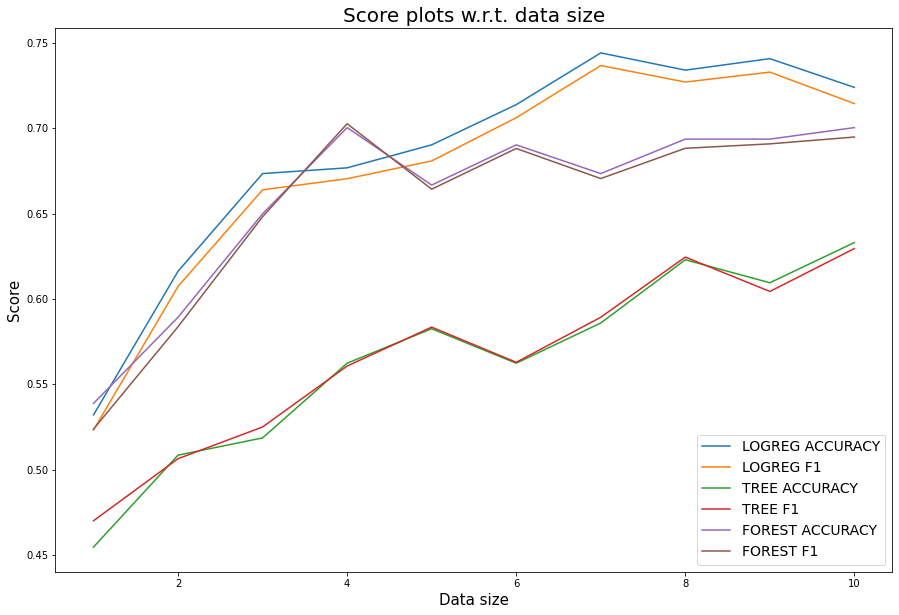

In [ ]:
fig=plt.figure()
# fig.set_size_inches((15, 10))
fig.show()
ax = fig.add_subplot(111)
# ax.set_xticks(alg_nums)
ax.set_xlabel('Data size', fontdict={'fontsize': 15})
ax.set_ylabel('Score', fontdict={'fontsize': 15})

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 10),
        }
plt.rcParams.update(params)


ax.plot(np.arange(1, 11), acc_list[0], label='LOGREG ACCURACY')
ax.plot(np.arange(1, 11), f_list[0], label='LOGREG F1')
ax.plot(np.arange(1, 11), acc_list[1], label='TREE ACCURACY')
ax.plot(np.arange(1, 11), f_list[1], label='TREE F1')
ax.plot(np.arange(1, 11), acc_list[2], label='FOREST ACCURACY')
ax.plot(np.arange(1, 11), f_list[2], label='FOREST F1')


plt.title('Score plots w.r.t. data size', fontdict={'fontsize': 20})
plt.legend(loc='lower right');

The tree predicts poorly, the random forest is slightly worse than the logistic regression.